In [2]:
import glob
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [2]:
all_files = glob.glob("year_17_18/*.csv")
year_17_18 = pd.concat((pd.read_csv(f) for f in all_files))  

In [3]:
year_17_18.drop(['tripduration','starttime','stoptime','start station name','end station id','end station name','end station latitude','end station longitude','bikeid','gender','usertype','birth year'],axis=1, inplace=True)
year_17_18.rename({'start station id': 'station_id','start station latitude': 'Latitude','start station longitude': 'Longitude'}, axis=1, inplace=True)
year_17_18.head()

,station_id,Latitude,Longitude
0,217.0,40.702772,-73.993836
1,490.0,40.751551,-73.993934
2,504.0,40.732219,-73.981656
3,445.0,40.727408,-73.981420
4,3423.0,40.661063,-73.979453


In [4]:
all_files1 = glob.glob("year_19_20/*.csv")
year_19_20 = pd.concat((pd.read_csv(f1) for f1 in all_files1))

In [5]:
year_19_20.drop(['tripduration','starttime','stoptime','start station name','end station id','end station name','end station latitude','end station longitude','bikeid','gender','usertype','birth year'],axis=1, inplace=True)
year_19_20.rename({'start station id': 'station_id','start station latitude': 'Latitude','start station longitude': 'Longitude'}, axis=1, inplace=True)
year_19_20.head()

,station_id,Latitude,Longitude
0,2006.0,40.765909,-73.976342
1,254.0,40.735324,-73.998004
2,3244.0,40.731437,-73.994903
3,526.0,40.747659,-73.984907
4,461.0,40.735877,-73.982050


In [6]:
all_files2 = glob.glob("year_21_22/*.csv")
year_21_22 = pd.concat((pd.read_csv(f2) for f2 in all_files2))

In [7]:
year_21_22.rename({'start_station_id': 'station_id','start_lat': 'Latitude','start_lng': 'Longitude'}, axis=1, inplace=True)
year_21_22.head()

,station_id,Latitude,Longitude
0,4513.06,40.689888,-73.981013
1,6584.12,40.755102,-73.974986
2,6584.12,40.755102,-73.974986
3,4898.02,40.702700,-73.920950
4,7543.15,40.795508,-73.941606


In [23]:
year_17_18.to_csv("year_17_18.csv")
year_19_20.to_csv("year_19_20.csv")
year_21_22.to_csv("year_21_22.csv")

In [124]:
bikepark=pd.read_csv("bike_parking.csv")
bikepark.head()

,num_docks_available,is_returning,eightd_has_available_keys,last_reported,num_bikes_available,num_ebikes_available,is_renting,is_installed,station_id,legacy_id,...,station_status,num_docks_disabled,eightd_active_station_services/0/id,valet/dock_blocked_count,valet/active,valet/region,valet/station_id,valet/off_dock_count,valet/valet_revision,valet/off_dock_capacity
0,17,0,False,1656077825,0,0,0,0,72,72,...,out_of_service,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,False,1669236882,31,6,1,1,79,79,...,active,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1,False,1669237074,20,2,1,1,82,82,...,active,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1,False,1669237055,51,4,1,1,83,83,...,active,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,1,False,1669237051,71,0,1,1,116,116,...,active,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
bikepark.drop(['num_bikes_available','num_ebikes_available','eightd_has_available_keys','is_returning','last_reported',
               'is_renting','is_installed','legacy_id', 'station_status','num_docks_disabled','num_bikes_disabled',
               'eightd_active_station_services/0/id', 'valet/dock_blocked_count', 'valet/active','valet/region', 
               'valet/station_id', 'valet/off_dock_count', 'valet/valet_revision','valet/off_dock_capacity'], 
            axis=1, inplace=True)
bikepark.head()

,num_docks_available,station_id
0,17,72
1,0,79
2,4,82
3,10,83
4,3,116


In [126]:
year_17_18=pd.read_csv("year_17_18.csv")
year_19_20=pd.read_csv("year_19_20.csv")
year_21_22=pd.read_csv("year_21_22.csv")

In [127]:
result = pd.merge(year_17_18, bikepark, how='inner', on = 'station_id')
result.head()

,station_id,Latitude,Longitude,num_docks_available
0,217,40.702772,-73.993836,5
1,217,40.702772,-73.993836,5
2,217,40.702772,-73.993836,5
3,217,40.702772,-73.993836,5
4,217,40.702772,-73.993836,5


In [128]:
result1 = pd.merge(year_19_20, bikepark, how='inner', on = 'station_id')
result1.head()

,station_id,Latitude,Longitude,num_docks_available
0,2006,40.765909,-73.976342,0
1,2006,40.765909,-73.976342,0
2,2006,40.765909,-73.976342,0
3,2006,40.765909,-73.976342,0
4,2006,40.765909,-73.976342,0


In [129]:
result2 = pd.merge(year_21_22, bikepark, how='inner', on = 'station_id')
result2.head()

,station_id,Latitude,Longitude,num_docks_available
0,4513,40.689888,-73.981013,9
1,4513,40.689888,-73.981013,9
2,4513,40.689888,-73.981013,9
3,4513,40.689888,-73.981013,9
4,4513,40.689888,-73.981013,9


In [130]:
result=result.drop_duplicates()
result.reset_index(drop=True,inplace=True)

In [131]:
result1=result1.drop_duplicates()
result1.reset_index(drop=True,inplace=True)

In [132]:
result2=result2.drop_duplicates()
result2.reset_index(drop=True,inplace=True)

In [133]:
final_result = pd.concat([result,result1, result2], axis=0)
final_result.reset_index(drop=True,inplace=True)
final_result.head()

,station_id,Latitude,Longitude,num_docks_available
0,217,40.702772,-73.993836,5
1,490,40.751551,-73.993934,2
2,504,40.732219,-73.981656,33
3,445,40.727408,-73.981420,77
4,3423,40.661063,-73.979453,23


In [134]:
final_result.to_csv('final_result.csv')

In [145]:
final_result=pd.read_csv("final_result.csv")

In [146]:
zips = gpd.read_file('ZIP_CODE_040114/ZIP_CODE_040114.shp')
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [147]:
geometry = [Point(xy) for xy in zip(final_result.Longitude, final_result.Latitude)]
data_geo=final_result.drop(['Latitude','Longitude'],axis=1)
geonew = gpd.GeoDataFrame(data_geo,geometry=geometry,crs={'init': 'epsg:4326'})

geonew.drop_duplicates(subset="station_id", keep=False, inplace=True)
geonew.reset_index(drop=True,inplace=True)
geonew.head()

,station_id,num_docks_available,geometry
0,434,6,POINT (-74.00366 40.74317)
1,537,63,POINT (-73.98409 40.74026)
2,3436,4,POINT (-74.01006 40.72132)
3,3147,29,POINT (-73.95407 40.77801)
4,3238,26,POINT (-73.95440 40.77391)


In [148]:
zips.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [149]:
data_citibike=gpd.sjoin(geonew.to_crs({'init':'epsg:2263'}),zips,op='within',how='inner')
data_citibike.head()

,station_id,num_docks_available,geometry,index_right,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
0,434,6,POINT (983234.582 210035.156),83,10011,0,New York,50594.0,1.811842e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
16,116,3,POINT (983835.043 209525.635),83,10011,0,New York,50594.0,1.811842e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
21,3658,0,POINT (983231.498 210166.039),83,10011,0,New York,50594.0,1.811842e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
28,3708,11,POINT (985826.889 207219.088),83,10011,0,New York,50594.0,1.811842e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
53,3472,0,POINT (982179.046 209881.963),83,10011,0,New York,50594.0,1.811842e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0


In [150]:
sanity = ['ZIPCODE','geometry','num_docks_available','station_id']
data_citibike=data_citibike[sanity]
data_citibike.reset_index(drop=True,inplace=True)
data_citibike.head()

,ZIPCODE,geometry,num_docks_available,station_id
0,10011,POINT (983234.582 210035.156),6,434
1,10011,POINT (983835.043 209525.635),3,116
2,10011,POINT (983231.498 210166.039),0,3658
3,10011,POINT (985826.889 207219.088),11,3708
4,10011,POINT (982179.046 209881.963),0,3472


In [151]:
citibike_zip=data_citibike.groupby(['ZIPCODE']).sum()
citibike_zip=citibike_zip.drop(['station_id'],axis=1)
citibike_zip.head()

,num_docks_available
ZIPCODE,
10001,24
10002,7
10003,51
10004,16
10007,17


In [152]:
citibike_merge = zips.merge(citibike_zip, on='ZIPCODE', how='inner')
citibike_merge.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,num_docks_available
0,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",149
1,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",23
2,10027,0,New York,58639.0,2.469528e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((998641.245 236978.872, 998618.484 23...",372
3,10024,0,New York,58521.0,2.287734e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((994210.038 234868.661, 994182.279 23...",53
4,10026,0,New York,34313.0,1.109268e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((999588.262 231919.431, 999462.779 23...",243


In [153]:
sanity = ['ZIPCODE','geometry','num_docks_available']
citibike_merge=citibike_merge[sanity]
citibike_merge.head()

,ZIPCODE,geometry,num_docks_available
0,11225,"POLYGON ((995908.365 183617.613, 996522.848 18...",149
1,11218,"POLYGON ((991997.113 176307.496, 992042.798 17...",23
2,10027,"POLYGON ((998641.245 236978.872, 998618.484 23...",372
3,10024,"POLYGON ((994210.038 234868.661, 994182.279 23...",53
4,10026,"POLYGON ((999588.262 231919.431, 999462.779 23...",243


Text(0.5, 1.0, 'Number of Docks Available by Zip Code')

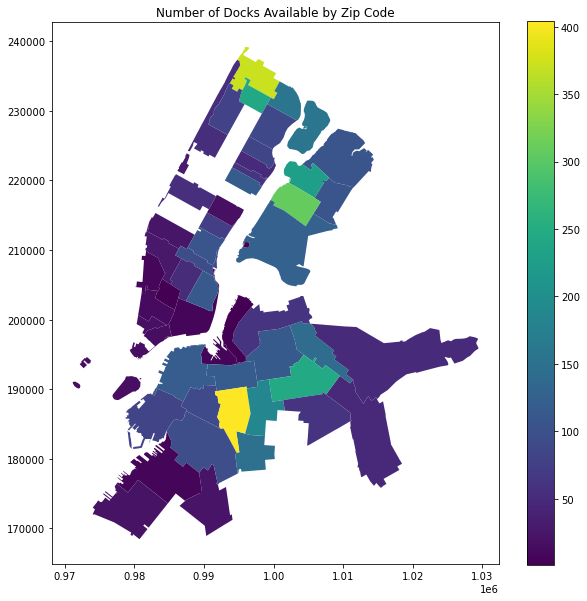

In [154]:
citibike_merge.plot(figsize = (10,10),column = 'num_docks_available',legend=True).set_title("Number of Docks Available by Zip Code")

In [155]:
citibike_merge.to_csv('citibike_merge.csv')